In [1]:
!pip install tensorflow
!pip install numpy 
!pip install matplotlib

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-03-11 17:15:22.097314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 17:15:22.753049: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 17:15:22.753084: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-11 17:15:24.792213: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("val",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 1781 images belonging to 7 classes.


In [4]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

2023-03-11 17:15:27.226052: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-11 17:15:27.226104: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-11 17:15:27.226133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7d16591abd99): /proc/driver/nvidia/version does not exist
2023-03-11 17:15:27.227091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [6]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [7]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 7, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(x=train_data,
          epochs=28,
          steps_per_epoch=len(train_data))

Epoch 1/28
 7/56 [==>...........................] - ETA: 1:19 - loss: 2.6435 - accuracy: 0.1696

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


56/56 [==============================] - 87s 2s/step - loss: 1.9338 - accuracy: 0.3094
Epoch 2/28
56/56 [==============================] - 84s 1s/step - loss: 1.5178 - accuracy: 0.4346
Epoch 3/28
56/56 [==============================] - 83s 1s/step - loss: 1.3475 - accuracy: 0.4969
Epoch 4/28
56/56 [==============================] - 82s 1s/step - loss: 1.2149 - accuracy: 0.5503
Epoch 5/28
56/56 [==============================] - 83s 1s/step - loss: 1.1842 - accuracy: 0.5693
Epoch 6/28
56/56 [==============================] - 83s 1s/step - loss: 1.0910 - accuracy: 0.6058
Epoch 7/28
56/56 [==============================] - 84s 1s/step - loss: 1.0728 - accuracy: 0.5991
Epoch 8/28
56/56 [==============================] - 82s 1s/step - loss: 1.0341 - accuracy: 0.6193
Epoch 9/28
56/56 [==============================] - 82s 1s/step - loss: 1.0023 - accuracy: 0.6311
Epoch 10/28
56/56 [==============================] - 82s 1s/step - loss: 0.9917 - accuracy: 0.6384
Epoch 11/28
56/56 [===========

In [9]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard", "e-waste", "glass", "medical", "metal", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


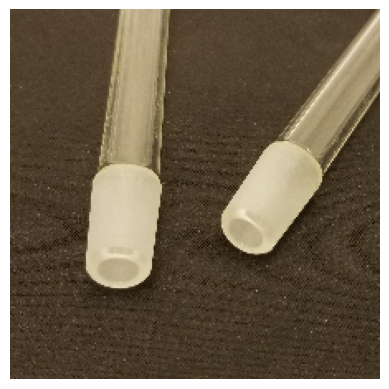

1/1 [==============================] - 0s 386ms/step
Your waste material is  glass  with  96.71  % accuracy


In [10]:
location = "val/glass/glass 1558.jpg"
waste_prediction(location)

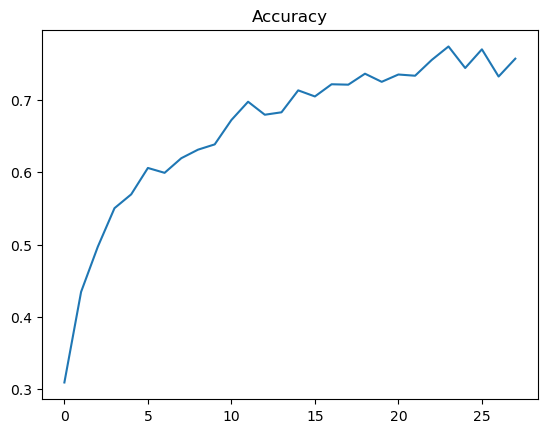

In [11]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

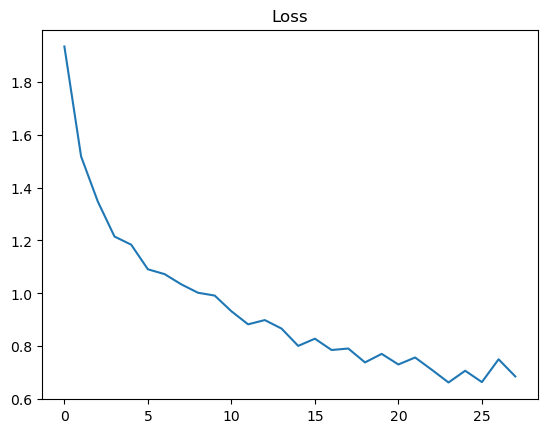

In [12]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [13]:
model.save("classifyWaste.h5")